<a href="https://colab.research.google.com/github/ProfAI/tf00/blob/master/5%20-%20Reti%20Neurali%20Convoluzionali/convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ConvNet: Reti Neurali Convoluzionali

In [6]:
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from cv2 import resize

In [7]:
dataset = tfds.load('malaria', split='train', shuffle_files=True)

In [8]:
IMG_SIZE = (128, 128)

In [9]:
def load_data(dataset, num_samples=None):
  images = []
  labels = []

  for i, example in enumerate(tfds.as_numpy(dataset)):

    if(num_samples!=None and i>=num_samples):
      break

    img = example["image"]
    img = resize(img, IMG_SIZE)
    images.append(img)
    labels.append(example["label"])

  images = np.array(images)
  labels = np.array(labels)

  return images, labels

images, labels = load_data(dataset)
num_classes = np.unique(labels).shape[0]

0


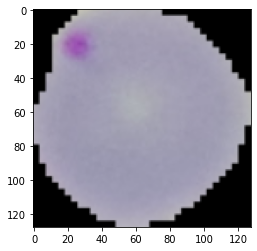

In [10]:
plt.imshow(images[0])
print(labels[0])

In [ ]:
X = images/255
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Rete Neurale

In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(128,128,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [28]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(128,128,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [23]:
model.fit(X_train, y_train, epochs=10, batch_size=512)

Epoch 1/10
44/44 [==============================] - 20s 459ms/step - loss: 782.7523 - accuracy: 0.5005
Epoch 2/10
44/44 [==============================] - 20s 456ms/step - loss: 0.6931 - accuracy: 0.5013
Epoch 3/10
44/44 [==============================] - 20s 456ms/step - loss: 0.6931 - accuracy: 0.5013
Epoch 4/10
13/44 [=======>......................] - ETA: 13s - loss: 0.6931 - accuracy: 0.5056

KeyboardInterrupt: ignored

In [16]:
X_train.shape

(22046, 128, 128, 3)

In [17]:
y_train

array([0, 1, 1, ..., 1, 1, 1])

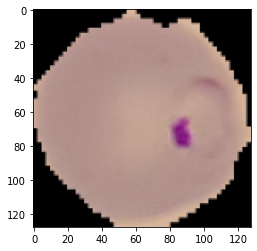

In [24]:
plt.imshow(X_train[0].reshape(128, 128, 3))

In [30]:
X_train.max()

255